In [1]:
import matplotlib.pyplot as plt
import os

from sqlcollect import getTable
from seismicZones import query


In [2]:
# ---------------------------SETUP AND COLLECTION OF QUAKES------------------------------------#
# Which region do you want to analyze ?
region = input('Input region : vrancea / romania / california / italy / japan : ')

# The side of the cubes that you split the region in 
#side = int(input('Input side of the cube split in km 5 / 10 / 20 : '))

# The condition for the SQL collection
sql_query= query(region)

# Magnitude windows for the condition that collects the database through mySQL
magMin = int(input('Input minimum magnitude: '))
magMax = int(input('Input maximum magnitude: '))
# Add to condition
sql_query+=f" AND magnitude>={magMin} AND magnitude<={magMax}"

print(sql_query)

# Collect the earthquakes
quakes = getTable(sql_query)
quakes.head()

SELECT * FROM romania WHERE datetime >='1976-01-01 00:00:00' AND latitude>=45.2 AND latitude<=46 AND longitude>=26 AND longitude<=27 AND depth>=50 AND depth<=200 AND magnitude>=2 AND magnitude<=10


/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,datetime,latitude,longitude,depth,magnitude
0,1976-08-19 19:03:00.800,45.54,26.37,162.0,2.3
1,1976-09-07 17:38:08.200,45.62,26.50,155.3,3.6
2,1976-10-01 17:50:43.200,45.68,26.49,146.0,6.0
3,1977-03-04 19:21:54.100,45.77,26.76,94.0,7.4
4,1977-03-04 21:21:01.100,45.22,26.65,141.0,3.0


In [3]:
mapcoords={'minLat':min(quakes['latitude']),
            'maxLat':max(quakes['latitude']),
            'minLon':min(quakes['longitude']),
            'maxLon':max(quakes['longitude']),
            'minDepth':min(quakes['depth']),
            'maxDepth':max(quakes['depth'])
            }

In [4]:
print(mapcoords)


{'minLat': 45.2, 'maxLat': 46.0, 'minLon': 26.0, 'maxLon': 27.0, 'minDepth': 50.0, 'maxDepth': 196.0}


## VISUALIZATION

In [5]:
#import ipympl

from visualization import visualize

In [8]:
# ----------------------------------------------------------------------------------------------#

# ----------------------------------2D MAP PROJECTION----------------------------------------------#
# Choose if you wish to include a projection of the region's map as 2D image under the 3D scatterplot
# You require png images with the maps for this to" work
withMap = input('Do you wish the scatter to have a projection of the region map ? True / False : ')

<Figure size 720x720 with 0 Axes>

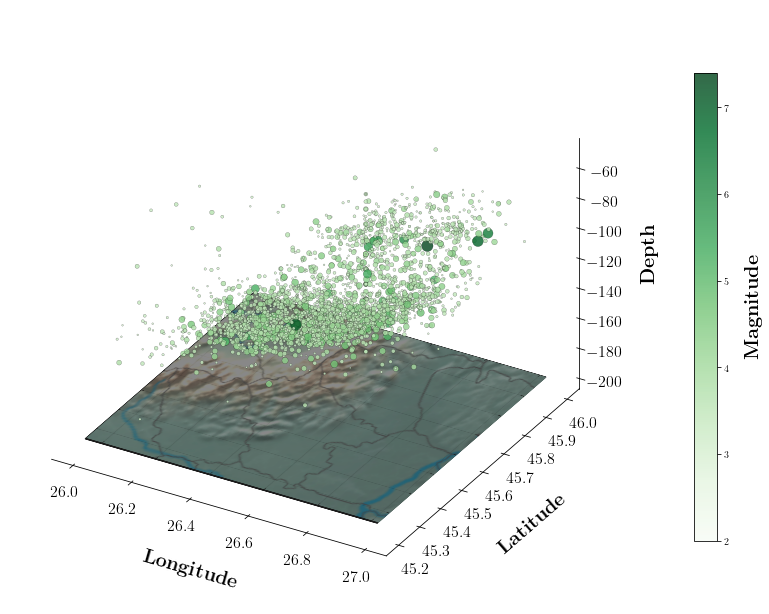

In [9]:
# %matplotlib widget

plt.figure(figsize=(10,10))
ax = visualize(quakes,region,withMap,mapcoords)



if not os.path.exists(f'./results/{region}/visualization'):
    os.makedirs(f'results/{region}/visualization')


if withMap == 'True':
    plt.savefig(f'./results/{region}/visualization/{region}_map.png', bbox_inches = "tight" )
    #plt.savefig(f'./results/{region}/visualization/{region}_maptest.svg', bbox_inches = "tight" )
elif withMap == 'False':
    plt.savefig(f'./results/{region}/visualization/{region}_nomap.png', bbox_inches = "tight")
    #plt.savefig(f'./results/{region}/visualization/{region}_nomaptest.svg', bbox_inches = "tight" )

## SPLIT REGION IN CUBES

In [7]:
from cubes import makeCubes

In [8]:
quakes

,datetime,latitude,longitude,depth,magnitude,magtype
0,1984-01-06 00:40:38.080,34.008,-117.224,12.0,2.56,l
1,1984-01-06 05:00:12.850,35.957,-118.337,4.2,3.25,l
2,1984-01-06 06:41:24.330,36.152,-118.008,-0.4,2.86,l
3,1984-01-08 11:24:14.180,36.776,-119.924,5.5,3.00,l
4,1984-01-01 18:27:55.230,36.364,-120.395,18.2,3.29,l
...,...,...,...,...,...,...
61053,1998-06-17 22:49:01.090,33.670,-117.009,-0.7,2.22,l
61054,1998-06-18 21:57:07.390,34.486,-116.453,1.3,2.56,l
61055,1998-06-18 22:46:26.180,33.669,-117.020,-0.7,2.09,l
61056,1998-06-19 11:13:44.860,33.661,-116.778,11.3,2.31,l


In [9]:
quakes = makeCubes(quakes,region)

In [10]:
quakes.head()

,datetime,latitude,longitude,depth,magnitude,magtype,xLatitude,yLongitude,zDepth,cubeIndex,cubeLatitude,cubeLongitude,cubeDepth
0,1984-01-06 00:40:38.080,34.008,-117.224,12.0,2.56,l,45,89,3,45893,34.0045,-117.2456,10.2
1,1984-01-06 05:00:12.850,35.957,-118.337,4.2,3.25,l,88,68,2,88682,35.9414,-118.3626,5.2
2,1984-01-06 06:41:24.330,36.152,-118.008,-0.4,2.86,l,93,75,1,93751,36.1667,-117.9902,0.2
3,1984-01-08 11:24:14.180,36.776,-119.924,5.5,3.00,l,107,39,2,107392,36.7973,-119.9051,5.2
4,1984-01-01 18:27:55.230,36.364,-120.395,18.2,3.29,l,97,30,5,97305,36.3468,-120.3839,20.2


## NETWORK CREATION

In [26]:
import networkx as nx
from network import graphCreation

In [27]:
quakesGraph = graphCreation(quakes)

KeyboardInterrupt: 

## MOTIFS

In [1]:
from nemomap.motifsdiscovery import getMotif
import json

In [2]:
# For which region networks do you want to discover motifs ?
region = input('Input region : vrancea / romania / california / italy / japan : ')

# What motifs do you want to discover ?
motif = input('Input motif: Triangles / Tetrahedrons : ')

In [3]:
stats = getMotif(region,motif)
motifStats={}
motifStats[region]={}
motifStats[region][motif]=stats

with open(f"./motifs/motifStats_{region}.json","w") as f:
    json.dump(motifStats,f)

queryTetrahedrons.txt
/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks
networkvrancea_10km_3mag.txt


Input Graph: Nodes - 320; Edges - 2534
Query Graph: Nodes - 4; Edges - 4

Query Graph (sub-graph) Edges: 
[0, 1]
[1, 2]
[2, 3]
[0, 3]

H node = [ 3 ]

Mapping: 37656

countN:  0

Mapping: 37656
Average of Mapping in Random Graphs: 20198.0

P value:  0.0
Z Score:  undefined
Time taken: 3.9635770320892334 seconds
networkvrancea_5km_4mag.txt


Input Graph: Nodes - 264; Edges - 375
Query Graph: Nodes - 4; Edges - 4

Query Graph (sub-graph) Edges: 
[0, 1]
[1, 2]
[2, 3]
[0, 3]

H node = [ 3 ]

Mapping: 3

countN:  1

Mapping: 3
Average of Mapping in Random Graphs: 5.0

P value:  1.0
Z Score:  undefined
Time taken: 0.022969961166381836 seconds
networkvrancea_10km_1mag.txt


Input Graph: Nodes - 536; Edges - 5048
Query Graph: Nodes - 4; Edges - 4

Query Graph (sub-graph) Edges: 
[0, 1]
[1, 2]
[2, 3]
[0, 3]

H node = [ 3 ]

Mapping: 119334

countN:  0

Mapping: 119334
Average of Mapping in Ra

KeyboardInterrupt: 

In [ ]:
for region in ['california','italy','japan']:
    for motif in ['Triangles','Tetrahedrons']:
        stats = getMotif(region,motif)
        motifStats={}
        motifStats[region]={}
        motifStats[region][motif]=stats
        

In [4]:
stats

{'networkvrancea_10km_3mag.txt': {'Nodes': 320,
  'Edges': 2534,
  'Mappings': 11909,
  'AvgMap': 3918.0,
  'Time': 0.45299386978149414},
 'networkvrancea_5km_4mag.txt': {'Nodes': 264,
  'Edges': 375,
  'Mappings': 3,
  'AvgMap': 5.0,
  'Time': 0.007648944854736328},
 'networkvrancea_10km_1mag.txt': {'Nodes': 536,
  'Edges': 5048,
  'Mappings': 37121,
  'AvgMap': 10419.0,
  'Time': 1.5338895320892334},
 'networkvrancea_10km_2mag.txt': {'Nodes': 519,
  'Edges': 4960,
  'Mappings': 36789,
  'AvgMap': 6380.0,
  'Time': 1.475003957748413},
 'networkvrancea_10km_4mag.txt': {'Nodes': 113,
  'Edges': 326,
  'Mappings': 135,
  'AvgMap': 41.0,
  'Time': 0.008726119995117188},
 'networkvrancea_5km_2mag.txt': {'Nodes': 1684,
  'Edges': 7383,
  'Mappings': 2137,
  'AvgMap': 945.0,
  'Time': 0.7603740692138672},
 'networkvrancea_5km_1mag.txt': {'Nodes': 1723,
  'Edges': 7471,
  'Mappings': 2124,
  'AvgMap': 886.0,
  'Time': 0.7348294258117676},
 'networkvrancea_5km_3mag.txt': {'Nodes': 983,
  'Edge

In [6]:
motifStats

{'vrancea': {'Triangles': {'networkvrancea_10km_3mag.txt': {'Nodes': 320,
    'Edges': 2534,
    'Mappings': 11909,
    'AvgMap': 3918.0,
    'Time': 0.45299386978149414},
   'networkvrancea_5km_4mag.txt': {'Nodes': 264,
    'Edges': 375,
    'Mappings': 3,
    'AvgMap': 5.0,
    'Time': 0.007648944854736328},
   'networkvrancea_10km_1mag.txt': {'Nodes': 536,
    'Edges': 5048,
    'Mappings': 37121,
    'AvgMap': 10419.0,
    'Time': 1.5338895320892334},
   'networkvrancea_10km_2mag.txt': {'Nodes': 519,
    'Edges': 4960,
    'Mappings': 36789,
    'AvgMap': 6380.0,
    'Time': 1.475003957748413},
   'networkvrancea_10km_4mag.txt': {'Nodes': 113,
    'Edges': 326,
    'Mappings': 135,
    'AvgMap': 41.0,
    'Time': 0.008726119995117188},
   'networkvrancea_5km_2mag.txt': {'Nodes': 1684,
    'Edges': 7383,
    'Mappings': 2137,
    'AvgMap': 945.0,
    'Time': 0.7603740692138672},
   'networkvrancea_5km_1mag.txt': {'Nodes': 1723,
    'Edges': 7471,
    'Mappings': 2124,
    'AvgMap': 